# Introduzione

## Librerie

In [1]:
# Librerie generali per l'analisi dei dati
import pandas as pd
import matplotlib.pyplot as plt
import os
from tabulate import tabulate
import numpy as np

# Libreria TSFRESH per l'estrazione di features
from tsfresh import extract_features
from tsfresh import extract_relevant_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.feature_extraction import MinimalFCParameters  
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction import settings

# Libreria LAZYPREDICT per la classificazione
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Librerie per la classificazione con normalizzazione
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Librerie per la classificazione e la valutazione dei risultati
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, jaccard_score

## Lettura dei dati

In [2]:
# Path to the dataset
path = 'C:/Users/miche/Desktop/Virtual Environment/zz - prove/csv_classificazione_taptap/'

## Funzioni

### Funzione di conversione del tempo da %H:%M:%S:%Frame a secondi

In [3]:
def convert_time_frame(time_str, frame_rate, shift_seconds):
    
    # Split the time string in hours, minutes, seconds and frames
    parts = time_str.split(':')
    
    # Calculate the total time in seconds: (hours:minutes:seconds:frames) - one hour + the shift
    total_seconds = (int(parts[0]) * 3600 + int(parts[1]) * 60 + int(parts[2]) + int(parts[3]) / frame_rate) - 3600 + shift_seconds

    return total_seconds

### Funzione per l'analisi dei dati e le creazioni delle labels

In [4]:
def labelling_custom(string, rate, shift_seconds):

    # Read the file csv with the values of the sensors
    df_sensor = pd.read_csv(path + string + '.csv', sep=',', header=0)


    # Read the file csv with the markers
    df_marker = pd.read_csv(path + string + '_markers.csv', sep=',', header=0)
    
    # Keep only the columns # (index) and Source In (istant of the marker)
    df_marker = df_marker[['#', 'Source In']]

    # Create a list of pairs of start and end values
    start_times = df_marker.loc[df_marker['#'] % 2 == 1, 'Source In']
    end_times = df_marker.loc[df_marker['#'] % 2 == 0, 'Source In']

    # Convert the time format
    start_times_seconds = start_times.apply(lambda x: convert_time_frame(x, rate, shift_seconds))
    end_times_seconds = end_times.apply(lambda x: convert_time_frame(x, rate, shift_seconds))

    return df_sensor, start_times_seconds, end_times_seconds

### Funzione per la creazione di un dataframe unico con la divisione delle labels fra 'Carezze' e 'No tocco'

In [5]:
def overall_custom(dataframe, string, starting_times, ending_times):
    df = dataframe.copy()
    df['Label'] = 'No tocco'
    df['name'] = string
    for start, end in zip(starting_times, ending_times):
        df.loc[(df['Time'] >= start) & (df['Time'] <= end), 'Label'] = 'TapTap'
    
    return df

### Funzione di creazione dei plot per la parte di analisi dei dati

In [6]:
def plot_custom(dataframe4value, time4start, time4time, slider):
    
    # Convert the dataframe in numpy arrays
    time = dataframe4value['Time'].to_numpy()
    flexsx = dataframe4value['Flexsx'].to_numpy()
    flexdx = dataframe4value['Flexdx'].to_numpy()
    pressure = dataframe4value['Pressure'].to_numpy()

    # Plot all the values with vertical lines that indicate the start and the end of the touch
    fig, axes = plt.subplots(3,1, figsize=(20,5))    
    axes[0].plot(time, flexsx)
    axes[1].plot(time, flexdx)
    axes[2].plot(time, pressure)
    
    for start, end in zip(time4start, time4time):
        if start < time[-1]:
            axes[0].axvspan(start, end, color='red', alpha=0.5)
            axes[1].axvspan(start, end, color='red', alpha=0.5)

    # Plot only 500 values with vertical lines that indicate the start and the end of the touch
    fig, axes = plt.subplots(3,1, figsize=(20,5))
    axes[0].plot(time[500*slider:500*(slider+1)], flexsx[500*slider:500*(slider+1)])
    axes[1].plot(time[500*slider:500*(slider+1)], flexdx[:500])
    axes[2].plot(time[500*slider:500*(slider+1)], pressure[500*slider:500*(slider+1)])
    # Plotta le fasce verticali
    for start, end in zip(time4start, time4time):
        if start < time[500*(slider+1)] and start > time[500*slider]: 
            axes[0].axvspan(start, end, color='red', alpha=0.5)
            axes[1].axvspan(start, end, color='red', alpha=0.5)
            axes[2].axvspan(start, end, color='red', alpha=0.5)

## Creazione del dataframe complessivo

In [7]:
df_overall = pd.DataFrame()

# Labelling delle carezze

## Carezze varie

### Michele

In [8]:
filename = 'michele_taptap'
shift = -1.9
frame_rate = 30
slider = 0

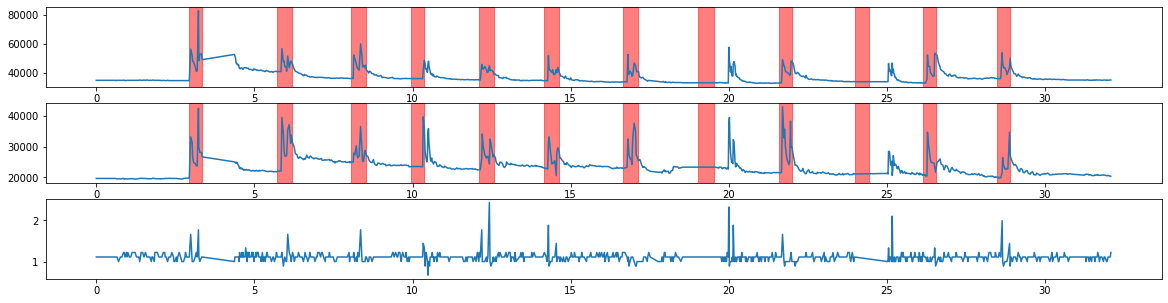

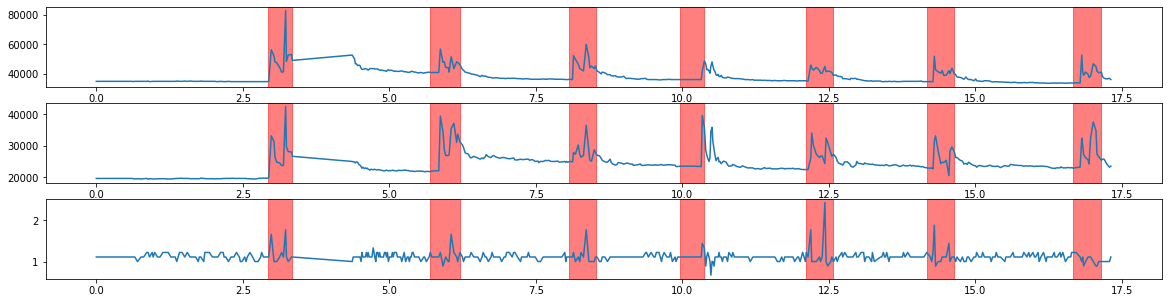

In [9]:
# Label the dataframe
df1, start_time1, end_times1 = labelling_custom(filename, frame_rate, shift)

# Plot the dataframe
plot_custom(df1, start_time1, end_times1, slider)

# Add the label to the dataframe
label_df1 = overall_custom(df1, filename, start_time1, end_times1)

# Add the dataframe to the overall dataframe
df_overall = pd.concat([df_overall, label_df1], ignore_index=True)

### Massimiliano

In [10]:
filename = 'massimiliano_taptap'
shift = -1.1
frame_rate = 29.97
slider = 0

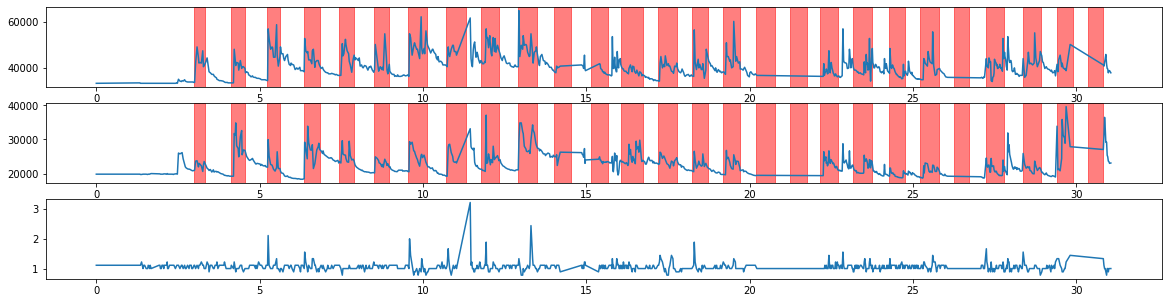

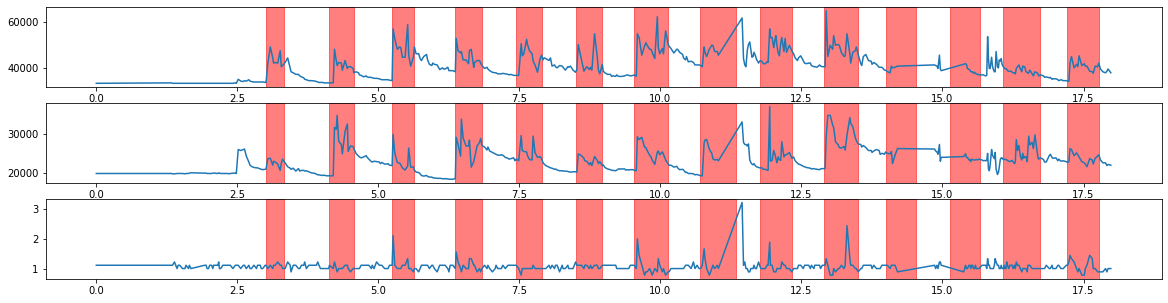

In [11]:
# Label the dataframe
df3, start_time3, end_times3 = labelling_custom(filename, frame_rate, shift)

# Plot the dataframe
plot_custom(df3, start_time3, end_times3, slider)

# Add the label to the dataframe
label_df3 = overall_custom(df3, filename, start_time3, end_times3)

# Add the dataframe to the overall dataframe
df_overall = pd.concat([df_overall, label_df3], ignore_index=True)

### Manuel

In [12]:
filename = 'manuel_taptap'
shift = - 0.9
frame_rate = 24
slider = 0

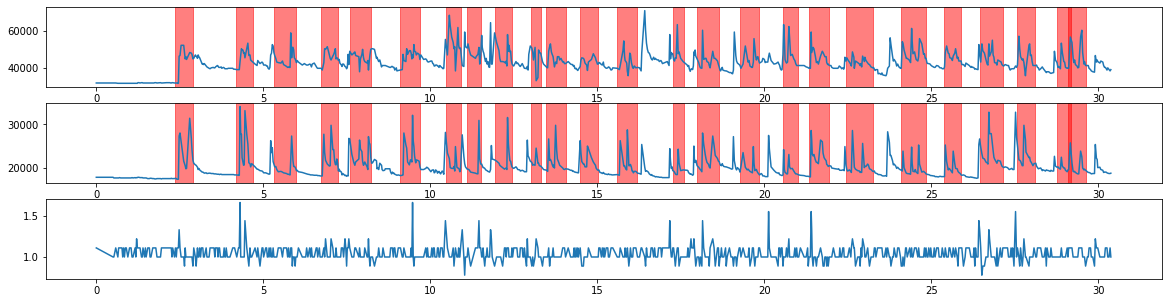

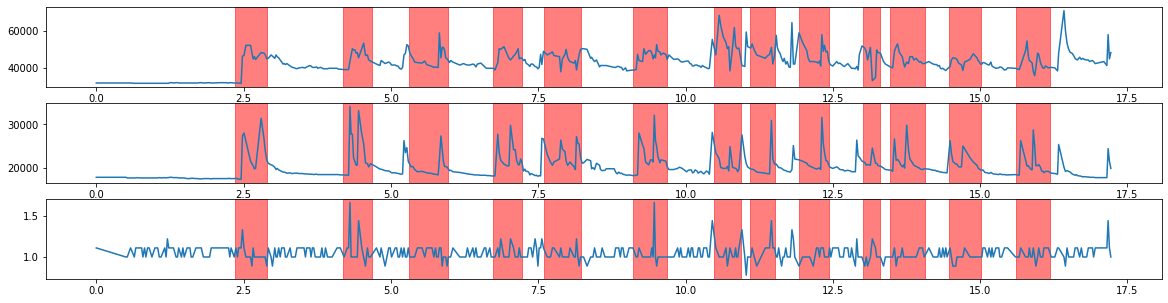

In [13]:
# Label the dataframe
df5, start_time5, end_times5 = labelling_custom(filename, frame_rate, shift)

# Plot the dataframe
plot_custom(df5, start_time5, end_times5, slider)

# Add the label to the dataframe
label_df5 = overall_custom(df5, filename, start_time5, end_times5)

# Add the dataframe to the overall dataframe
df_overall = pd.concat([df_overall, label_df5], ignore_index=True)

### Carlo

In [14]:
filename = 'carlo_taptap'
shift = - 1.3
frame_rate = 30
slider = 0

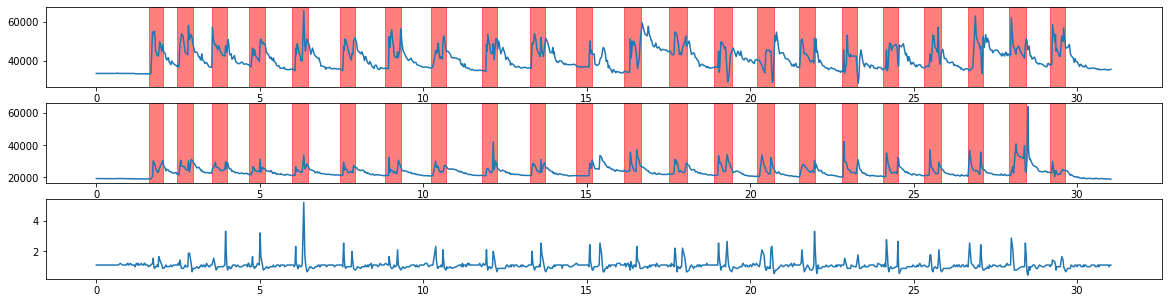

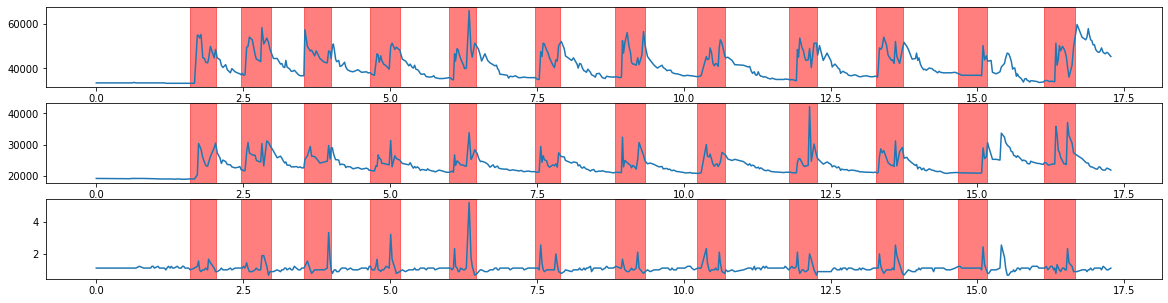

In [15]:
# Label the dataframe
df6, start_time6, end_times6 = labelling_custom(filename, frame_rate, shift)

# Plot the dataframe
plot_custom(df6, start_time6, end_times6, slider)

# Add the label to the dataframe
label_df6 = overall_custom(df6, filename, start_time6, end_times6)

# Add the dataframe to the overall dataframe
df_overall = pd.concat([df_overall, label_df6], ignore_index=True)

### Lorenzo

In [16]:
filename = 'lorenzo_taptap'
shift = - 1
frame_rate = 30
slider = 0

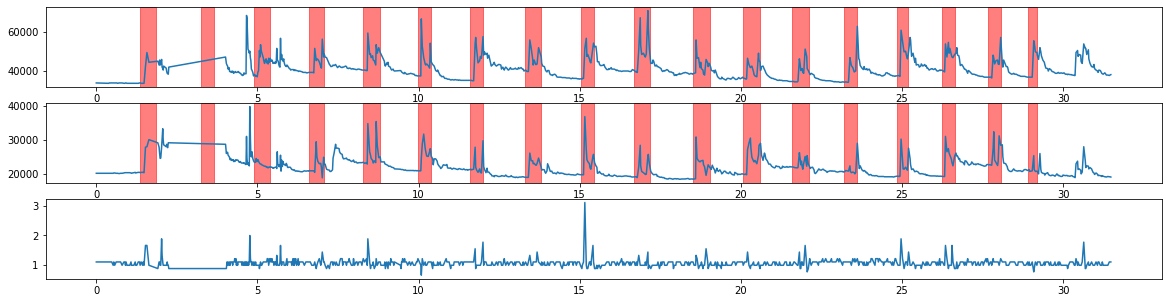

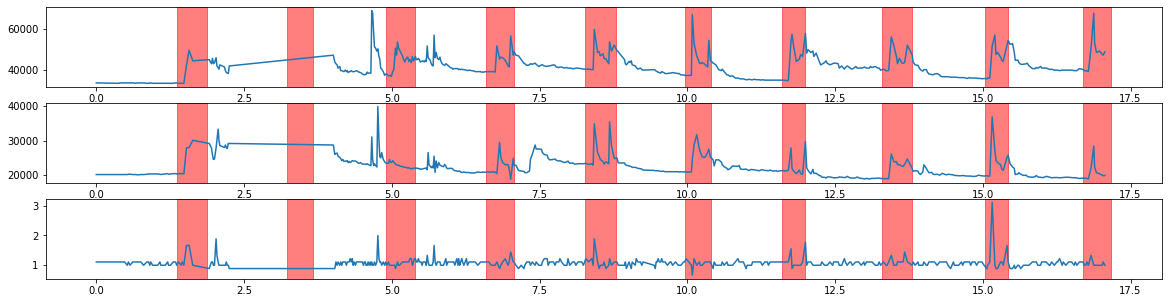

In [17]:
# Label the dataframe
df7, start_time7, end_times7 = labelling_custom(filename, frame_rate, shift)

# Plot the dataframe
plot_custom(df7, start_time7, end_times7, slider)

# Add the label to the dataframe
label_df7 = overall_custom(df7, filename, start_time7, end_times7)

# Add the dataframe to the overall dataframe
df_overall = pd.concat([df_overall, label_df7], ignore_index=True)

## Pot di tutti i dataframe analizzati fin'ora

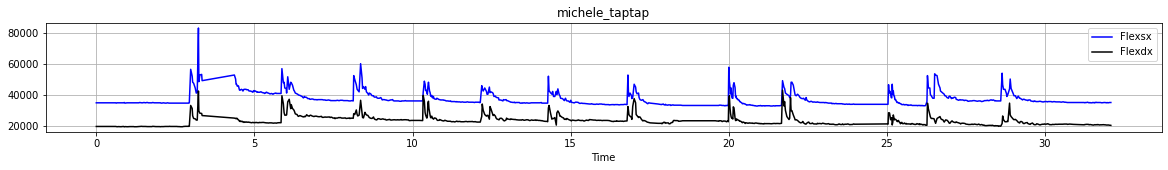

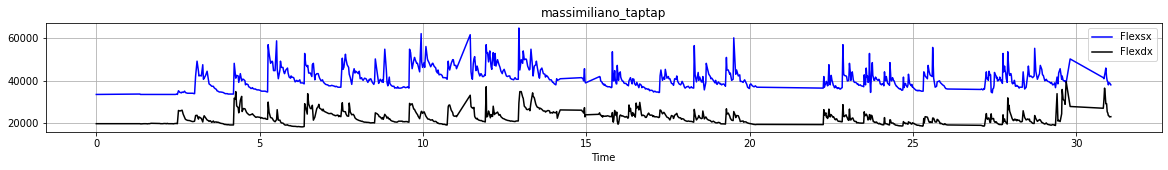

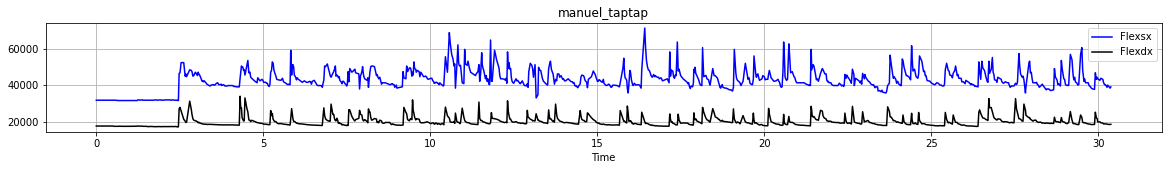

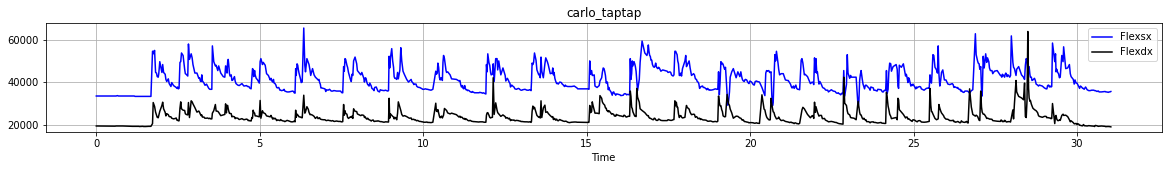

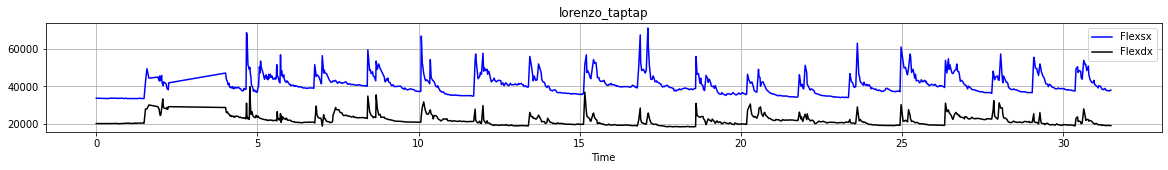

In [18]:
for id in df_overall['name'].unique():
    df_overall[df_overall['name'] == id].plot(x='Time', y=['Flexsx', 'Flexdx'], figsize=(20,2), title=id, grid=True, color=['blue', 'black'])
    for label, start, end in zip(df_overall[df_overall['name'] == id]['Label'], df_overall[df_overall['name'] == id]['Time'], df_overall[df_overall['name'] == id]['Time']):
        if label == 'Carezza':
            plt.axvspan(start, end, color='orange', alpha=0.5)

# Estrazione con vari tipi di segnale

## Carezze

### Dati delle carezze

In [19]:
df_data = df_overall.copy()

# Add the id column
df_data['id'] = 0

# The ids will start from 1
ids = 1

for index,label in enumerate(df_data['Label']):
    try:
        if df_overall['Label'][index] is not df_data['Label'][index-1]:
            ids += 1
        elif df_overall['name'][index] is not df_data['name'][index-1]:
            ids += 1
    except:
        pass
    df_data['id'][index] = ids

# Drop the columns 'Label' and 'name'
data = df_data[['Time','Flexsx', 'Flexdx', 'Pressure', 'id']]

# Print the size of the variables taken into account
print('Size of the dataset: ', data.shape)
print('Number of ids: ', data['id'].nunique())

Size of the dataset:  (4538, 5)
Number of ids:  197


In [20]:
# Initialize the target array
target = []

for i in df_data['id'].unique():
    
    # If the label of the ids is 'Carezza'
    if (df_data.loc[df_data['id'] == i, 'Label'] == 'TapTap').any():
        target.append(False)
    
    # If the label of the ids is 'No tocco'
    else:
        target.append(True)

# Convert the target array in a Pandas Series
target_serie = pd.Series(target, index = range(1, len(target) + 1))

# Print the target array size
print('Size of the target array: ', target_serie.shape)

Size of the target array:  (197,)


## Tocchi vari

In [21]:
path_altro = 'C:/Users/miche/Desktop/Virtual Environment/zz - prove/csv_classificazione_notap/'

In [22]:
# read all the file .csv in the folder and append them to the dataframe
df_tocchi_vari = pd.DataFrame()

for filename in os.listdir(path_altro):
    if filename.endswith('.csv'):
        file_path = os.path.join(path_altro, filename)
        df = pd.read_csv(file_path)
        df_tocchi_vari = pd.concat([df_tocchi_vari, df], ignore_index=True)

df_tocchi_vari['Label'] = 'No tocco'

# Print the size of the dataframe
print('Size of the dataframe: ', df_tocchi_vari.shape)

Size of the dataframe:  (44982, 6)


In [23]:
# Divide the dataframe in n parts of random lenght between 10 and 100 index and give them a id in order
np.random.seed(69)

# Copy of the dataframe
df_copy = df_tocchi_vari.copy()
df_altro = df_tocchi_vari.copy()

# Maximum length of a group
max_group_len = 100

# Inizialize the id as the higher value of data['id'] + 1
id_max = data['id'].max() + 1

# The number of groups needed
num_groups = int(np.ceil(len(df_copy) / max_group_len))

# Distribuite the values of the dataframe in n groups of random length between 10 and 100
while len(df_copy) > 0:
    # The length of the next group is a random number between 10 and 100
    group_length = np.random.randint(10, max_group_len + 1)
    
    # Check if the length of the next group is higher than the length of the dataframe
    group_length = min(group_length, len(df_copy))
    
    # Assign the same id to all the rows of the group
    indices_list = df_copy.index[:group_length].tolist()
    df_altro.loc[indices_list, 'id'] = id_max
    id_max += 1

    # Delete the rows of the group from the dataframe
    df_copy = df_copy.iloc[group_length:]

# Eliminate the data not selected in the previous step
df_altro = df_altro.dropna(subset=['id'])

# Convert the column id from float to int
df_altro['id'] = df_altro['id'].astype(int)

# Print the dimension of each group
print(tabulate((df_altro.groupby('id').size()).reset_index(name='group_size'), headers='keys', tablefmt='psql'))

+-----+------+--------------+
|     |   id |   group_size |
|-----+------+--------------|
|   0 |  198 |           64 |
|   1 |  199 |           85 |
|   2 |  200 |           83 |
|   3 |  201 |          100 |
|   4 |  202 |           65 |
|   5 |  203 |           30 |
|   6 |  204 |           59 |
|   7 |  205 |           32 |
|   8 |  206 |           19 |
|   9 |  207 |           66 |
|  10 |  208 |           48 |
|  11 |  209 |           98 |
|  12 |  210 |           22 |
|  13 |  211 |           47 |
|  14 |  212 |           85 |
|  15 |  213 |           63 |
|  16 |  214 |           13 |
|  17 |  215 |           90 |
|  18 |  216 |           49 |
|  19 |  217 |           34 |
|  20 |  218 |           12 |
|  21 |  219 |           49 |
|  22 |  220 |           34 |
|  23 |  221 |           57 |
|  24 |  222 |          100 |
|  25 |  223 |           85 |
|  26 |  224 |           54 |
|  27 |  225 |           33 |
|  28 |  226 |           45 |
|  29 |  227 |           53 |
|  30 |  2

In [24]:
data_altro = df_altro[['Time', 'Flexsx', 'Flexdx', 'Pressure', 'id']]
target_altro = [True] * df_altro['id'].nunique()

target_series_altro = pd.Series(target_altro, index=range(1, len(target_altro) + 1))

In [25]:
# Print the size of the variables taken into account
print('Size of the dataset: ', data_altro.shape)
print('Number of ids: ', data_altro['id'].nunique())

print('Size of the target array: ', target_series_altro.shape)

Size of the dataset:  (44982, 5)
Number of ids:  803
Size of the target array:  (803,)


## Concatenazione dei dati

In [26]:
data_all = pd.concat([data, data_altro], ignore_index=True)
target_all = pd.concat([target_serie, target_series_altro], ignore_index=True)
target_all.index = target_all.index + 1 # Shift the index of one position. The index starts from 1 as the ids

In [27]:
print("Size of the dataset: ", data_all.shape)
print("Size of the target array: ", target_all.shape)
print("Number of ids: ", data_all['id'].nunique())
print("Number of True: ", target_all.sum())
print("Number of False: ", len(target_all) - target_all.sum())

Size of the dataset:  (49520, 5)
Size of the target array:  (1000,)
Number of ids:  1000
Number of True:  904
Number of False:  96


# Estrazione delle features

## Metodo minima + kind

In [28]:
# Extract the features
features_minima = extract_features(data_all, column_id='id', column_sort='Time', default_fc_parameters=MinimalFCParameters())

# Impute the missing values
impute(features_minima)

# Select the relevant features
features_filtered = select_features(features_minima, target_all)

Feature Extraction:   0%|          | 0/30 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 30/30 [00:02<00:00, 10.57it/s]


In [29]:
print('The number of features before and after the selection are respectively {} and {}'.format(features_minima.shape[1], features_filtered.shape[1]))

The number of features before and after the selection are respectively 30 and 23


In [30]:
# Kind of features
kind_all = settings.from_columns(features_filtered)

# Print the kind of features
print('Kind of features for the I method: ')
print(tabulate(kind_all, headers='keys', tablefmt='psql'))

Kind of features for the I method: 
+--------------------+--------------------+--------------------+
| Flexsx             | Pressure           | Flexdx             |
|--------------------+--------------------+--------------------|
| length             | length             | length             |
| sum_values         | sum_values         | sum_values         |
| standard_deviation | standard_deviation | standard_deviation |
| variance           | variance           | variance           |
| root_mean_square   | maximum            | minimum            |
| median             | absolute_maximum   | median             |
| mean               | root_mean_square   |                    |
| absolute_maximum   | mean               |                    |
| maximum            |                    |                    |
+--------------------+--------------------+--------------------+


## Classificazione con Lazypredict

### Kind method

In [31]:
# Extract the features
features_all = extract_features(data_all, column_id='id', column_sort='Time', kind_to_fc_parameters=kind_all)

Feature Extraction:   0%|          | 0/30 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 30/30 [00:02<00:00, 10.48it/s]


In [32]:
%%capture
# Classify the data with the I method

# Data
X_all = features_all.values
y_all = target_all

# Split the data in train and test set
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Initialize the classifier
clf_all = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Train the classifier
models_all, predictions_all = clf_all.fit(X_train_all, X_test_all, y_train_all, y_test_all)

In [33]:
print("The results for the classification are: ")
print(tabulate(models_all, headers='keys', tablefmt='psql'))

The results for the classification are: 
+-------------------------------+------------+---------------------+-----------+------------+--------------+
| Model                         |   Accuracy |   Balanced Accuracy |   ROC AUC |   F1 Score |   Time Taken |
|-------------------------------+------------+---------------------+-----------+------------+--------------|
| LinearSVC                     |      0.945 |            0.876316 |  0.876316 |   0.951614 |   0.0228581  |
| Perceptron                    |      0.945 |            0.876316 |  0.876316 |   0.951614 |   0.0115588  |
| GaussianNB                    |      0.88  |            0.842105 |  0.842105 |   0.906667 |   0.0107379  |
| XGBClassifier                 |      0.965 |            0.839474 |  0.839474 |   0.965787 |   0.0726779  |
| LGBMClassifier                |      0.965 |            0.839474 |  0.839474 |   0.965787 |   0.10383    |
| ExtraTreesClassifier          |      0.955 |            0.834211 |  0.834211 |   0.95

# Modelli

In [34]:
%%capture

# Data
X = features_filtered.values
y = target_all

# Split the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
clf1 = LinearSVC(random_state=0, tol=1e-5)
clf2 = Perceptron(tol=1e-5, random_state=0)
clf3 = GaussianNB()
clf4 = XGBClassifier()
clf5 = LGBMClassifier()
clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf7 = RandomForestClassifier(n_estimators=100, random_state=0)
clf8 = ExtraTreeClassifier(random_state=0)

# Train the classifiers
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
clf7.fit(X_train, y_train)
clf8.fit(X_train, y_train)

# Predict the test set
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)
y_pred5 = clf5.predict(X_test)
y_pred6 = clf6.predict(X_test)
y_pred7 = clf7.predict(X_test)
y_pred8 = clf8.predict(X_test)

In [35]:
# Print the classification report
print('Classification report for LinearSVC: ')
print(classification_report(y_test, y_pred1))
print('Classification report for Perceptron: ')
print(classification_report(y_test, y_pred2))
print('Classification report for GaussianNB: ')
print(classification_report(y_test, y_pred3))
print('Classification report for XGBClassifier: ')
print(classification_report(y_test, y_pred4))
print('Classification report for LGBMClassifier: ')
print(classification_report(y_test, y_pred5))
print('Classification report for ExtraTreesClassifier: ')
print(classification_report(y_test, y_pred6))
print('Classification report for RandomForestClassifier: ')
print(classification_report(y_test, y_pred7))
print('Classification report for ExtraTreeClassifier: ')
print(classification_report(y_test, y_pred8))

# Print the f1 score
print('F1 score for LinearSVC: ', f1_score(y_test, y_pred1))
print('F1 score for Perceptron: ', f1_score(y_test, y_pred2))
print('F1 score for GaussianNB: ', f1_score(y_test, y_pred3))
print('F1 score for XGBClassifier: ', f1_score(y_test, y_pred4))
print('F1 score for LGBMClassifier: ', f1_score(y_test, y_pred5))
print('F1 score for ExtraTreesClassifier: ', f1_score(y_test, y_pred6))
print('F1 score for RandomForestClassifier: ', f1_score(y_test, y_pred7))
print('F1 score for ExtraTreeClassifier: ', f1_score(y_test, y_pred8))

print("")

# Print the jaccard score
print('Jaccard score for LinearSVC: ', jaccard_score(y_test, y_pred1))
print('Jaccard score for Perceptron: ', jaccard_score(y_test, y_pred2))
print('Jaccard score for GaussianNB: ', jaccard_score(y_test, y_pred3))
print('Jaccard score for XGBClassifier: ', jaccard_score(y_test, y_pred4))
print('Jaccard score for LGBMClassifier: ', jaccard_score(y_test, y_pred5))
print('Jaccard score for ExtraTreesClassifier: ', jaccard_score(y_test, y_pred6))
print('Jaccard score for RandomForestClassifier: ', jaccard_score(y_test, y_pred7))
print('Jaccard score for ExtraTreeClassifier: ', jaccard_score(y_test, y_pred8))

Classification report for LinearSVC: 
              precision    recall  f1-score   support

       False       0.50      0.20      0.29        10
        True       0.96      0.99      0.97       190

    accuracy                           0.95       200
   macro avg       0.73      0.59      0.63       200
weighted avg       0.94      0.95      0.94       200

Classification report for Perceptron: 
              precision    recall  f1-score   support

       False       0.56      0.50      0.53        10
        True       0.97      0.98      0.98       190

    accuracy                           0.95       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.95      0.95      0.95       200

Classification report for GaussianNB: 
              precision    recall  f1-score   support

       False       0.31      0.80      0.44        10
        True       0.99      0.91      0.95       190

    accuracy                           0.90       200
   macro avg

In [36]:
# Save the model classifier and the kind of features in the Desktop
import joblib

joblib.dump(clf6, 'C:/Users/miche/Desktop/ExtraTreesClassifier.joblib')

joblib.dump(clf8, 'C:/Users/miche/Desktop/ExtraTreeClassifier.joblib')
joblib.dump(kind_all, 'C:/Users/miche/Desktop/kind_all.joblib')

# Save the model with pickle    
import pickle

with open('C:/Users/miche/Desktop/ExtraTreesClassifier.pkl', 'wb') as file:
    pickle.dump(clf6, file)

with open('C:/Users/miche/Desktop/ExtraTreeClassifier.pkl', 'wb') as file:
    pickle.dump(clf8, file)
    